In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

**Create dataset**

In [4]:
# predict variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
        'False', 'False', 'False', 'True', 'True', 'False', 'True']

# class label
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 
        'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

**Encoding the features using one-hot encoding**

In [9]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Data
data = tuple(zip(Outlook, Temperature, Humidity, Wind))
print(f"Data:- \n{data}\n")

# Encoder
X_enc = OneHotEncoder().fit_transform(data).toarray()
print(f"Encoder:- \n{X_enc}")

# Label
lbl = LabelEncoder()
Y_enc = lbl.fit_transform(Play)

Data:- 
(('Rainy', 'Hot', 'High', 'False'), ('Rainy', 'Hot', 'High', 'True'), ('Overcast', 'Hot', 'High', 'False'), ('Sunny', 'Mild', 'High', 'False'), ('Sunny', 'Cool', 'Normal', 'False'), ('Sunny', 'Cool', 'Normal', 'True'), ('Overcast', 'Cool', 'Normal', 'True'), ('Rainy', 'Mild', 'High', 'False'), ('Rainy', 'Cool', 'Normal', 'False'), ('Sunny', 'Mild', 'Normal', 'False'), ('Rainy', 'Mild', 'Normal', 'True'), ('Overcast', 'Mild', 'High', 'True'), ('Overcast', 'Hot', 'Normal', 'False'), ('Sunny', 'Mild', 'High', 'True'))

Encoder:- 
[[0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1

**Merge different features to prepare dataset**

In [10]:
print("Features:- ")
for i in X_enc:
    print(i)

Features:- 
[0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
[0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
[1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
[0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
[0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
[0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
[1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
[0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
[0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
[0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
[0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
[1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
[0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]


**Create a decision tree classifier object**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# create an object
X_train, X_test, Y_train, Y_test = train_test_split(X_enc, Y_enc, test_size=0.25, random_state=78)
obj = DecisionTreeClassifier(criterion='entropy')
obj.fit(X_train, Y_train)

# Predict Output
Y_predict = obj.predict(X_test)
print(f"Accuracy:- \n{metrics.accuracy_score(Y_test, Y_predict)}\n")
print(f"Prediction:- \n{X_test}\n")
print(f"Y Predicted:- \n{Y_predict}\n")
print(f"Actual Y Test:- \n{Y_test}\n")

Accuracy:- 
0.25

Prediction:- 
[[1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]]

Y Predicted:- 
[0 0 0 0]

Actual Y Test:- 
[1 0 1 1]



**Classification Report**

In [20]:
print(metrics.classification_report(Y_test, Y_predict, zero_division=0))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.00      0.00      0.00         3

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4



**Confusion Matrix**

Confusion Matrix:- 
[[1 0]
 [3 0]]



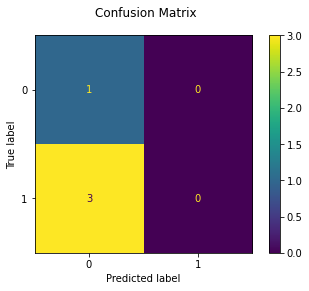

In [21]:
from sklearn.metrics import confusion_matrix

print(f"Confusion Matrix:- \n{confusion_matrix(Y_test, Y_predict)}\n")

fig = metrics.plot_confusion_matrix(obj, X_test, Y_test)
fig.figure_.suptitle("Confusion Matrix")
plt.show()

**Convert to png**

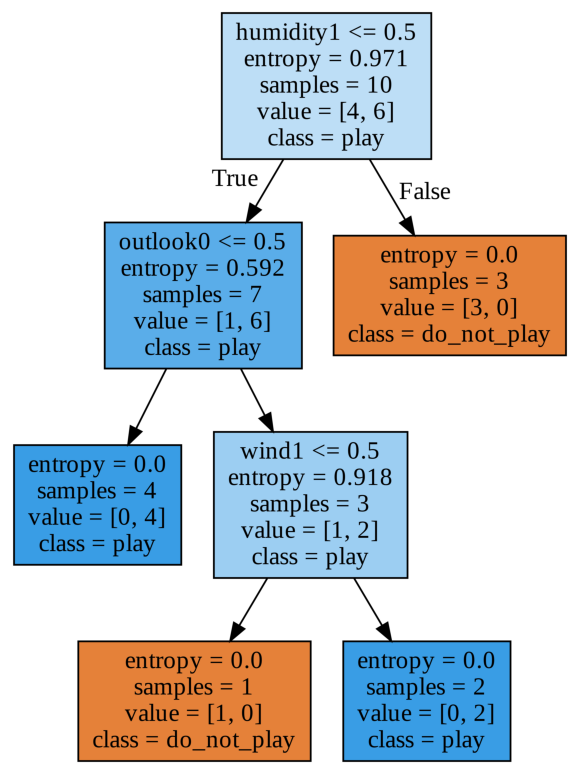

In [25]:
from subprocess import call

export_graphviz(obj, out_file='tree_entropy.dot', 
                feature_names=['outlook2','outlook1','outlook0','temperature2','temperature1','temperature0','humidity1','humidity0','wind1','wind0'], 
                class_names=['do_not_play','play'], 
                filled=True)

# Convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

# Display
plt.figure(figsize = (14, 14))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();